# KNN & PCA 

## THEORETICAL:



### **1. What is K-Nearest Neighbors (KNN) and how does it work?**

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression problems. It’s known as a "lazy learner" because it doesn’t learn an explicit model during training— it just stores the data.

How it works: When a new data point comes in (called a query point), KNN:
  1. Calculates the distance between this point and all the points in the training data.
  2. Selects the K nearest neighbors (i.e., data points with the smallest distances).
  3. Makes a prediction:
    Classification: Majority vote among the K neighbors (e.g., if most neighbors are labeled as "spam", the new point is also "spam").
    Regression: Averages the output values of the K neighbors.



### **2. What is the difference between KNN Classification and KNN Regression?**

| Feature | KNN Classification | KNN Regression |
|--------|---------------------|----------------|
| Target | Categorical (e.g., Yes/No, Classes) | Continuous (e.g., prices, scores) |
| Prediction | Majority vote among neighbors | Average (or weighted average) of neighbors |
| Example | Predicting if an email is spam or not | Predicting house prices |

So, the difference is in the type of output and how the output is calculated.



### **3. What is the role of the distance metric in KNN?**

The distance metric determines how we measure closeness between data points.

Common distance metrics:
Euclidean Distance(default): Straight-line distance.
Manhattan Distance: Sum of absolute differences.
Minkowski Distance: Generalized form of Euclidean and Manhattan.

The choice of distance metric impacts accuracy. If features are on different scales (e.g., age vs. income), the distance can be biased toward larger numbers—so feature scaling is important.



### **4. What is the Curse of Dimensionality in KNN?**

As the number of features (dimensions) increases:
Data points become sparse.
All distances between points become similar.
The concept of "nearness" breaks down, making it hard for KNN to identify truly close neighbors.

This is called the Curse of Dimensionality, and it makes KNN less effective in high-dimensional spaces.

Solution is: Use dimensionality reduction (like PCA) or feature selection to reduce irrelevant features.



### **5. How can we choose the best value of K in KNN?**

Choosing the right K (number of neighbors) is important:
Small K(like 1 or 3): May lead to overfitting (too sensitive to noise).
Large K: May lead to underfitting (too generalized).

Best way: Use Cross-Validation:
Try multiple values of K (e.g., 1 to 30).
Use validation accuracy to find the optimal K.

---

### **6. What are KD Tree and Ball Tree in KNN?**

These are data structures used to speed up KNN by avoiding brute-force search.

KD Tree (K-Dimensional Tree):
Splits the data based on one feature at a time.
Works best for low-dimensional data (less than ~30 features).

Ball Tree:
Uses hyperspheres (balls) to partition data.
Works better than KD Tree for high-dimensional data.

They help reduce computation time when dealing with large datasets.



### **7. When should you use KD Tree vs. Ball Tree?**

| Condition | Use KD Tree | Use Ball Tree |
|-----------|-------------|---------------|
| Low dimensions (<30) | Yes | No |
| High dimensions (>30) | No | Yes |
| Balanced data | Yes | Yes |
| Sparse or complex dat | No | Yes |

Use KD Tree for fast, simple datasets with few dimensions.
Use Ball Tree for more complex, high-dimensional data.



### **8. What are the disadvantages of KNN?**

1. Slow during prediction (no training step, computes distances at runtime).
2. Sensitive to irrelevant features (especially in high dimensions).
3. Needs feature scaling.
4. Memory intensive (stores all training data).
5. Affected by noisy data or outliers.
6. Not suitable for very large datasets without optimizations.



### **9. How does feature scaling affect KNN?**

Feature scaling (e.g., Standardization or Min-Max Scaling) is crucial in KNN because it relies on distance calculations.

Example:
1. Suppose feature A ranges from 1 to 1000, and feature B ranges from 0 to 1.
2. Without scaling, A will dominate the distance calculation, and B’s effect will be ignored.

Always scale features before applying KNN (especially with Euclidean or Minkowski distance).


### 10. What is PCA (Principal Component Analysis)?

PCA (Principal Component Analysis) is a dimensionality reduction technique used to:
1. Reduce the number of features in a dataset
2. While retaining as much important (variance-based) information as possible

It transforms the original features into a new set of features called principal components which are uncorrelated and ordered by importance.


### 11. How does PCA work?

1. Standardize the data (important if features are on different scales).
2. Compute the covariance matrix (measures how variables vary together).
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Sort eigenvectors by decreasing eigenvalues (these become the principal components).
5. Choose top K components and project the original data onto them.


### 12. What is the geometric intuition behind PCA?

Imagine a cloud of points in 3D space:
PCA finds new axes (principal components) that point in the directions of highest variance in the data.

The 1st principal component is the direction with the most spread.
The 2nd is orthogonal to the 1st and captures the next most variance.

Projecting data onto these axes gives a lower-dimensional view of the data with maximum information retention.


### 13. What is the difference between Feature Selection and Feature Extraction?

Feature Selection and Feature Extraction are both techniques used for dimensionality reduction, but they work differently. 

Feature Selection involves choosing a subset of the original features based on their relevance to the target variable, without altering them. This helps simplify the model while keeping the features interpretable. 

In contrast, Feature Extraction creates new features by transforming or combining the original features into a lower-dimensional space, often using methods like PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis). 

While feature selection keeps the original meaning of features, feature extraction may lead to better performance at the cost of interpretability, since the new features are often not easily understood in terms of the original data.

### 14. What are Eigenvalues and Eigenvectors in PCA?

1. Eigenvectors represent the directions (principal components).
2. Eigenvalues represent the amount of variance captured by each eigenvector.

In PCA:

The eigenvector with the largest eigenvalue is the first principal component.
These define the new axes along which the data is projected.


### 15. How do you decide the number of components to keep in PCA?


Explained Variance Ratio:
Choose components that explain, for example, 95% of the total variance.
Use a scree plot (graph of variance vs. components).

Elbow Method:
Look for a "bend" or "elbow" in the plot of cumulative explained variance.

The goal is to balance dimensionality reduction and information loss.


### 16. Can PCA be used for classification?

PCA itself is not a classification algorithm. But it can be used before classification to:

1. Reduce dimensions
2. Remove noise or redundant features
3. Speed up training and improve generalization

Example: Use PCA to reduce features → then apply KNN, SVM, or Logistic Regression.


### 17. What are the limitations of PCA?

1. Linear only: Can’t capture non-linear relationships.
2. Loss of interpretability: Transformed features are combinations of original ones.
3. Sensitive to scale: Requires feature scaling.

Assumes high variance = important information, which may not always be true.

Doesn’t use target variable (unsupervised) — so not ideal alone for classification.


### 18. How do KNN and PCA complement each other?


KNN struggles with high-dimensional data due to the curse of dimensionality.
PCA helps by reducing dimensions while preserving important information.

So, using PCA before KNN: 
1. Speeds up KNN
2. Improves accuracy
3. Reduces overfitting

Original data → PCA (reduce to top N features) → KNN classifier


### 19. How does KNN handle missing values in a dataset?

K-Nearest Neighbors (KNN) does not inherently handle missing values—meaning if your dataset contains missing values, KNN will not work properly unless the data is preprocessed. This is because KNN relies on distance calculations (like Euclidean distance) between data points, and any missing value can break these calculations or give incorrect results.

To address this, you must handle missing values before applying KNN, and there are several approaches:

1. Data Imputation (Most Common):

Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the feature column. This is simple but may not always be accurate.

KNN Imputation: A smarter approach where the missing values of a data point are filled in using the values from its nearest neighbors (based on non-missing features). This method preserves the data structure better.


2. Row or Column Removal: If only a few rows or columns contain missing data, and their removal doesn't affect the dataset significantly, they can be dropped. However, this might cause data loss.


3. Using Models for Imputation: Advanced methods like using regression or machine learning models to predict the missing values based on other features.


Once missing values are handled using one of these techniques, KNN can be applied normally. In short, KNN requires clean, complete data to function correctly, and handling missing values is a necessary preprocessing step.



### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?


PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both dimensionality reduction techniques, but they differ in purpose and approach. 

PCA is an unsupervised method that reduces dimensions by finding directions (principal components) that capture the maximum variance in the data, without considering class labels. 

On the other hand, LDA is a supervised method that aims to maximize class separability by finding a feature space that best distinguishes between different classes using the label information. 

While PCA focuses on capturing the structure of the data, LDA focuses on improving classification performance. Therefore, PCA is generally used when you want to reduce dimensions for clustering or visualization, and LDA is preferred when the goal is classification with labeled data.

# PRACTICAL:

### 21. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Create and train the KNN classifier (using k=3 here)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 5. Make predictions and evaluate accuracy
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# 6. Print the model accuracy
print(f"Accuracy of KNN classifier on Iris dataset: {accuracy * 100:.2f}%")

Accuracy of KNN classifier on Iris dataset: 100.00%


### 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).


In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# 5. Predict and evaluate using Mean Squared Error (MSE)
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# 6. Print the MSE
print(f"Mean Squared Error (MSE) of KNN Regressor on synthetic data: {mse:.2f}")


Mean Squared Error (MSE) of KNN Regressor on synthetic data: 275.95


### 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN with Euclidean distance (p=2)
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# 5. Train KNN with Manhattan distance (p=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# 6. Print and compare accuracies
print(f"Accuracy with Euclidean Distance (p=2): {acc_euclidean * 100:.2f}%")
print(f"Accuracy with Manhattan Distance (p=1): {acc_manhattan * 100:.2f}%")


Accuracy with Euclidean Distance (p=2): 100.00%
Accuracy with Manhattan Distance (p=1): 100.00%


### 24. Train a KNN Classifier with different values of K and visualize decision boundaried.


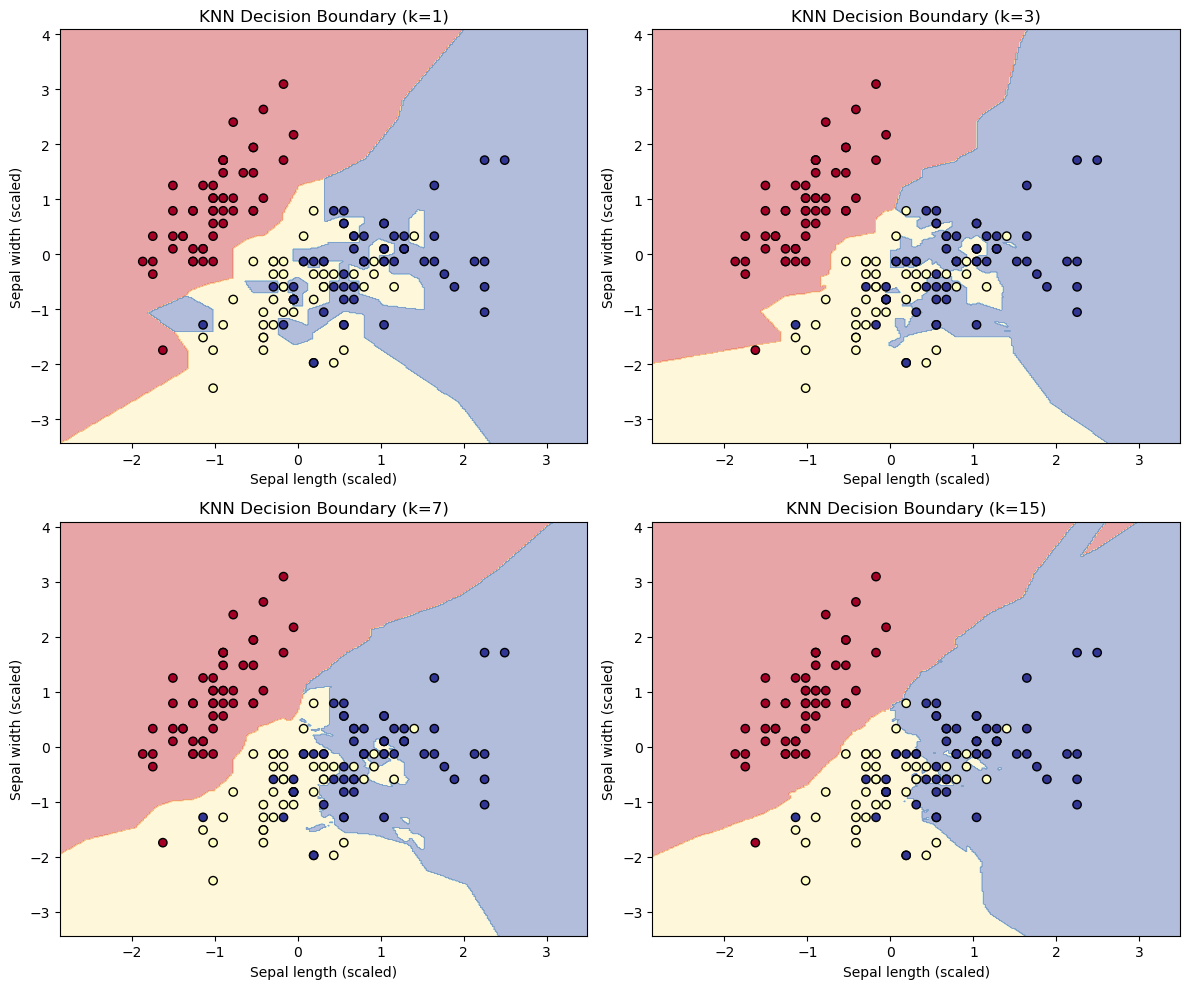

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

# 1. Load Iris dataset and select only 2 features for 2D plotting
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only first two features: sepal length & sepal width
y = iris.target

# 2. Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Set meshgrid for plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 4. Try different values of K and plot
k_values = [1, 3, 7, 15]
plt.figure(figsize=(12, 10))

for i, k in enumerate(k_values, 1):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel('Sepal length (scaled)')
    plt.ylabel('Sepal width (scaled)')

plt.tight_layout()
plt.show()


### 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### --- Without Feature Scaling ---
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

### --- With Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# 3. Print comparison
print(f"Accuracy WITHOUT Scaling: {acc_unscaled * 100:.2f}%")
print(f"Accuracy WITH Scaling:    {acc_scaled * 100:.2f}%")


Accuracy WITHOUT Scaling: 100.00%
Accuracy WITH Scaling:    100.00%


### 26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [7]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Generate synthetic dataset with 5 features
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, random_state=42)

# 2. Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} ({ratio * 100:.2f}% of variance)")


Principal Component 1: 0.4653 (46.53% of variance)
Principal Component 2: 0.4030 (40.30% of variance)
Principal Component 3: 0.1317 (13.17% of variance)
Principal Component 4: 0.0000 (0.00% of variance)
Principal Component 5: 0.0000 (0.00% of variance)


### 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### --- KNN WITHOUT PCA ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_no_pca = knn.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

### --- Apply PCA and then KNN ---
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# 4. Compare results
print(f"Accuracy WITHOUT PCA: {acc_no_pca * 100:.2f}%")
print(f"Accuracy WITH PCA (2 components): {acc_pca * 100:.2f}%")


Accuracy WITHOUT PCA: 100.00%
Accuracy WITH PCA (2 components): 93.33%


### 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 5. Set up GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 6. Get best model and evaluate on test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# 7. Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")
print(f"Test Set Accuracy with Best Model: {accuracy * 100:.2f}%")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 95.83%
Test Set Accuracy with Best Model: 100.00%


### 29.Train a KNN Classifier and check the number of misclassified samples.


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = knn.predict(X_test_scaled)

# 6. Count misclassified samples
misclassified_count = (y_pred != y_test).sum()

# 7. Print results
print(f"Total test samples: {len(y_test)}")
print(f"Misclassified samples: {misclassified_count}")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Total test samples: 30
Misclassified samples: 0
Accuracy: 100.00%


### 30.Train a PCA model and visualize the cumulative explained variance.

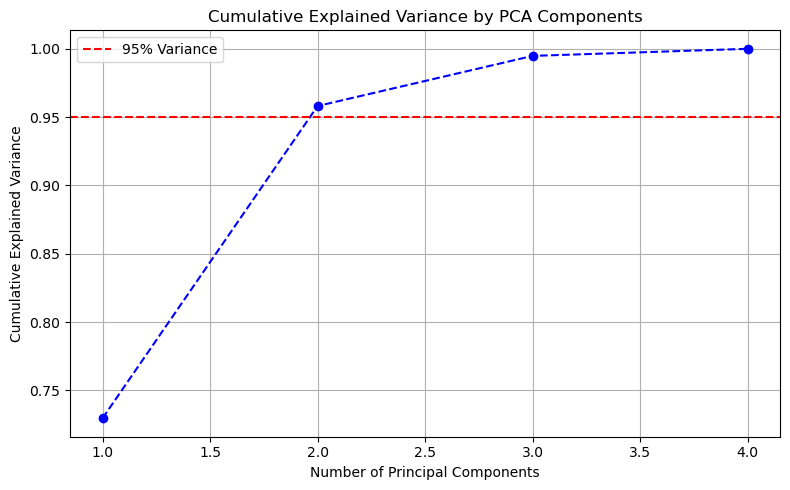

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 5. Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()


### 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
y_pred_uniform = knn_uniform.predict(X_test_scaled)
acc_uniform = accuracy_score(y_test, y_pred_uniform)

# 5. Train KNN with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
y_pred_distance = knn_distance.predict(X_test_scaled)
acc_distance = accuracy_score(y_test, y_pred_distance)

# 6. Print accuracy comparison
print(f"Accuracy with Uniform Weights : {acc_uniform * 100:.2f}%")
print(f"Accuracy with Distance Weights: {acc_distance * 100:.2f}%")


Accuracy with Uniform Weights : 100.00%
Accuracy with Distance Weights: 100.00%


### 32. Train a KNN Regressor and analyze the effect of different K values on performance.


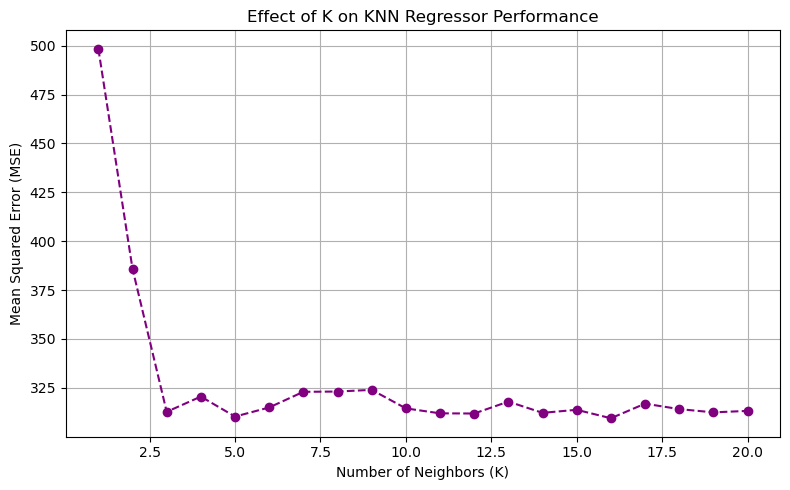

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Create synthetic regression dataset
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Test different values of K
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# 5. Plot MSE vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='purple')
plt.title("Effect of K on KNN Regressor Performance")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 33. Implement KNN Imputation for handling missing values in a dataset.


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load Iris dataset and convert to DataFrame
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Introduce random missing values (for demonstration)
rng = np.random.default_rng(seed=42)
missing_mask = rng.choice([True, False], size=X.shape, p=[0.1, 0.9])
X[missing_mask] = np.nan

print("Before Imputation (showing first 5 rows with missing values):")
print(X.head())

# 3. Scale data before KNN Imputation (important for distance calculations)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
X_imputed_scaled = imputer.fit_transform(X_scaled)

# 5. Inverse transform to original scale
X_imputed = scaler.inverse_transform(X_imputed_scaled)
X_imputed_df = pd.DataFrame(X_imputed, columns=iris.feature_names)

print("\nAfter KNN Imputation (first 5 rows):")
print(X_imputed_df.head())


Before Imputation (showing first 5 rows with missing values):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                NaN               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               NaN                1.4               0.2

After KNN Imputation (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.100000          3.500000                1.4               0.2
1           4.733333          3.000000                1.4               0.2
2           4.700000          3.200000                1.3               0.2
3           4.600000          3.100000                1.5               0.2
4           5.000000          3.233333                1.4       

### 34. Train a PCA model and visualize the data projection onto the first two principal components.


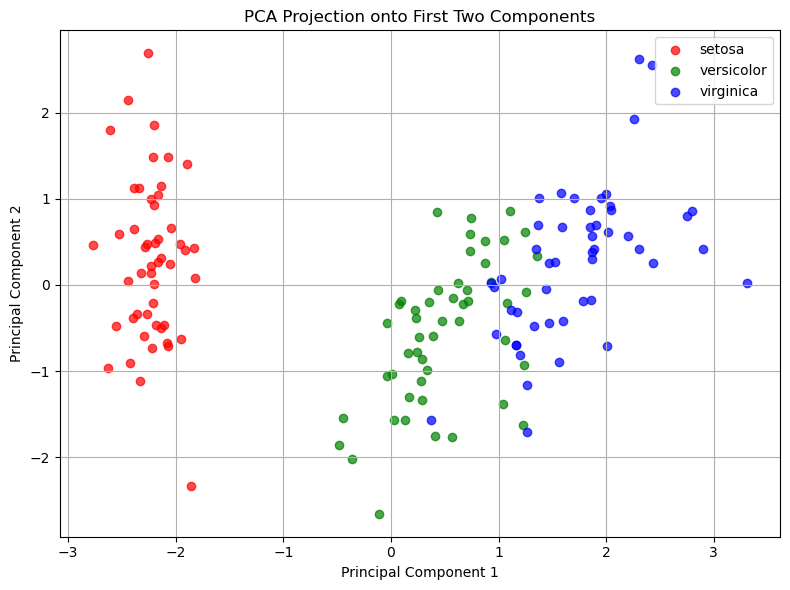

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 1. Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Convert to DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# 5. Plot projection onto first 2 principal components
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(df_pca[df_pca['target'] == i]['PC1'],
                df_pca[df_pca['target'] == i]['PC2'],
                label=target_name, color=colors[i], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection onto First Two Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train with KD Tree
start_kd = time.time()
knn_kd = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd.fit(X_train_scaled, y_train)
y_pred_kd = knn_kd.predict(X_test_scaled)
kd_time = time.time() - start_kd
kd_acc = accuracy_score(y_test, y_pred_kd)

# 5. Train with Ball Tree
start_bt = time.time()
knn_bt = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_bt.fit(X_train_scaled, y_train)
y_pred_bt = knn_bt.predict(X_test_scaled)
bt_time = time.time() - start_bt
bt_acc = accuracy_score(y_test, y_pred_bt)

# 6. Print results
print("KNN with KD Tree:")
print(f"Accuracy: {kd_acc * 100:.2f}%")
print(f"Training + Prediction Time: {kd_time:.6f} seconds\n")

print("KNN with Ball Tree:")
print(f"Accuracy: {bt_acc * 100:.2f}%")
print(f"Training + Prediction Time: {bt_time:.6f} seconds")


KNN with KD Tree:
Accuracy: 100.00%
Training + Prediction Time: 0.004842 seconds

KNN with Ball Tree:
Accuracy: 100.00%
Training + Prediction Time: 0.020104 seconds


### 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

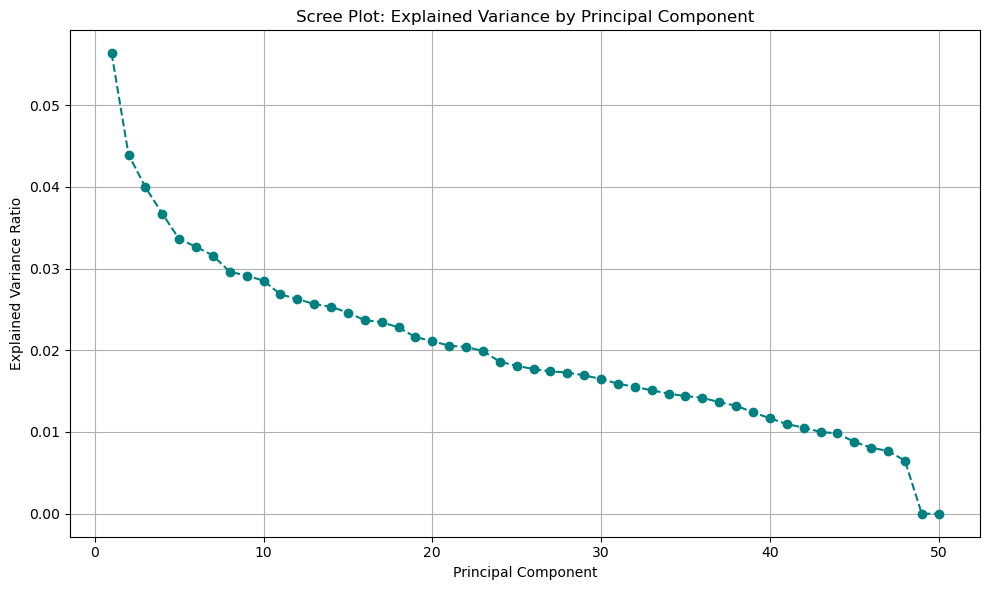

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Generate a high-dimensional synthetic dataset
X, y = make_classification(n_samples=500, n_features=50, n_informative=30, n_classes=3, random_state=42)

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Plot the Scree plot (explained variance per component)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o', linestyle='--', color='teal')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


### 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict
y_pred = knn.predict(X_test_scaled)

# 6. Evaluate with precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 38. Train a PCA model and analyze the effect of different numbers of components on accuracy.


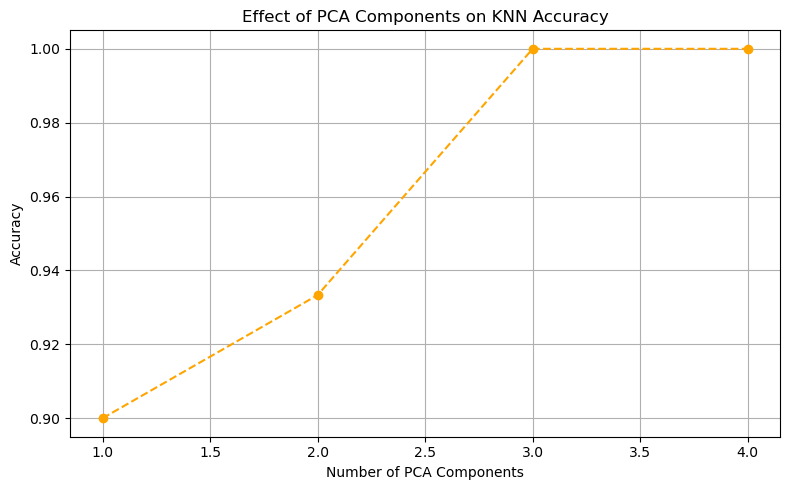

PCA Components: 1 → Accuracy: 90.00%
PCA Components: 2 → Accuracy: 93.33%
PCA Components: 3 → Accuracy: 100.00%
PCA Components: 4 → Accuracy: 100.00%


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Try different numbers of PCA components
components_range = [1, 2, 3, 4]
accuracies = []

for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Plot accuracy vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracies, marker='o', linestyle='--', color='orange')
plt.title('Effect of PCA Components on KNN Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print results
for n, acc in zip(components_range, accuracies):
    print(f"PCA Components: {n} → Accuracy: {acc * 100:.2f}%")


### 39. Train a KNN Classifier with different leaf_size values and compare accuracy.


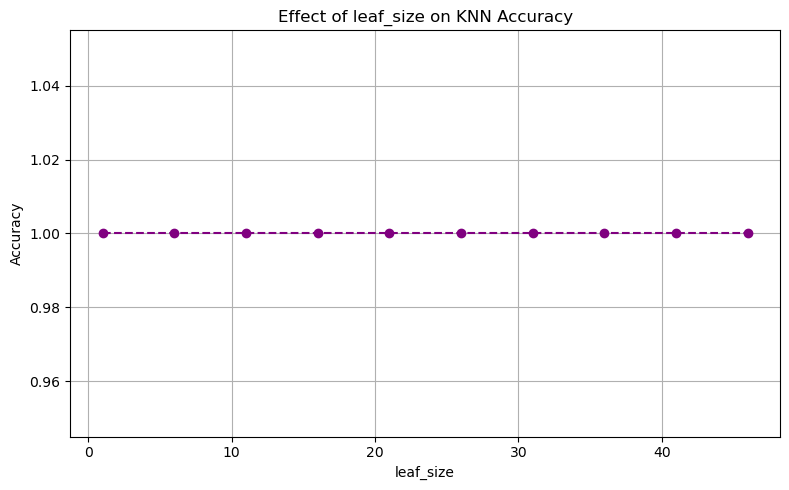

leaf_size = 1 → Accuracy: 100.00%
leaf_size = 6 → Accuracy: 100.00%
leaf_size = 11 → Accuracy: 100.00%
leaf_size = 16 → Accuracy: 100.00%
leaf_size = 21 → Accuracy: 100.00%
leaf_size = 26 → Accuracy: 100.00%
leaf_size = 31 → Accuracy: 100.00%
leaf_size = 36 → Accuracy: 100.00%
leaf_size = 41 → Accuracy: 100.00%
leaf_size = 46 → Accuracy: 100.00%


In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Try different leaf_size values
leaf_sizes = range(1, 51, 5)
accuracies = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=leaf_size)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Plot the results
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='--', color='purple')
plt.title('Effect of leaf_size on KNN Accuracy')
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print results
for ls, acc in zip(leaf_sizes, accuracies):
    print(f"leaf_size = {ls} → Accuracy: {acc * 100:.2f}%")


### 40. Train a PCA model and visualize how data points are transformed before and after PCA.


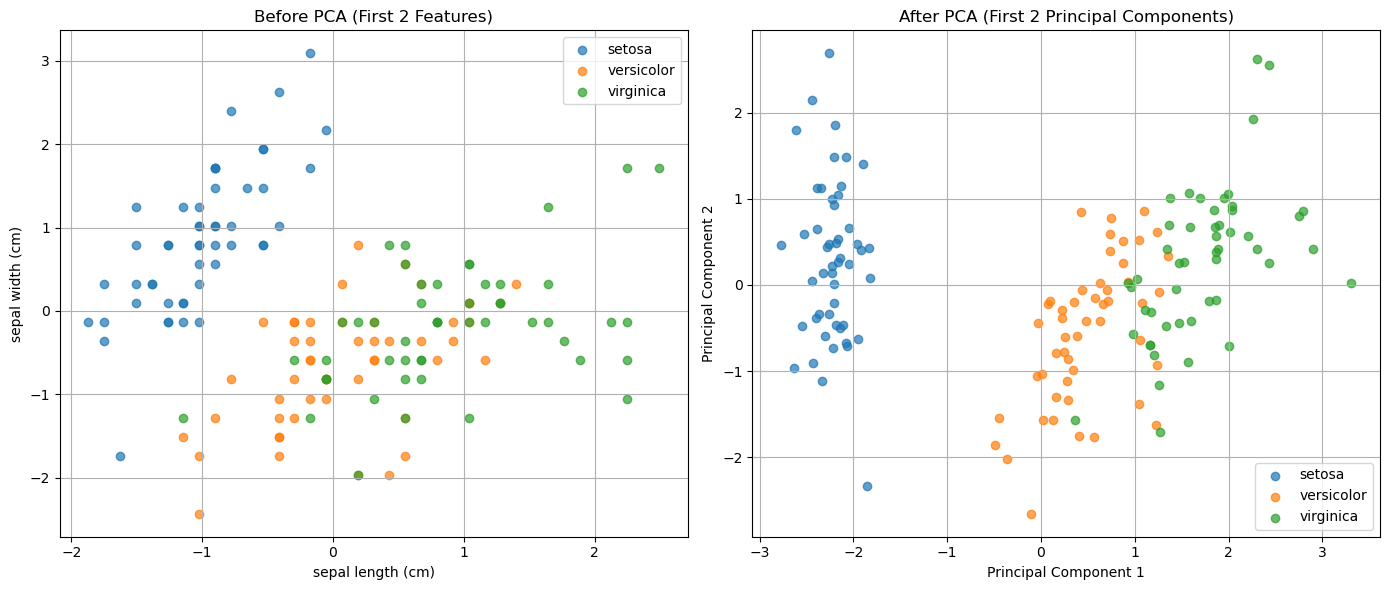

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 1. Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA transformation (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Plot original data (first 2 original features)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for target in set(y):
    plt.scatter(X_scaled[y == target, 0], X_scaled[y == target, 1],
                label=target_names[target], alpha=0.7)
plt.title("Before PCA (First 2 Features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.grid(True)

# 5. Plot transformed data (after PCA)
plt.subplot(1, 2, 2)
for target in set(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                label=target_names[target], alpha=0.7)
plt.title("After PCA (First 2 Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.


In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Classification Report on Wine Dataset:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report on Wine Dataset:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



### 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.


In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Try different distance metrics
metrics = ['euclidean', 'manhattan']
mse_scores = {}

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[metric] = mse
    print(f"Distance Metric: {metric} → MSE: {mse:.4f}")


Distance Metric: euclidean → MSE: 0.4324
Distance Metric: manhattan → MSE: 0.3889


### 43. Train a KNN Classifier and evaluate using ROC-AUC score.

In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Predict probabilities
y_proba = knn.predict_proba(X_test_scaled)

# 6. Compute ROC-AUC (One-vs-Rest multiclass)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print(f"ROC-AUC Score (macro-average, One-vs-Rest): {roc_auc:.4f}")


ROC-AUC Score (macro-average, One-vs-Rest): 0.9995


### 44. Train a PCA model and visualize the variance captured by each principal component.

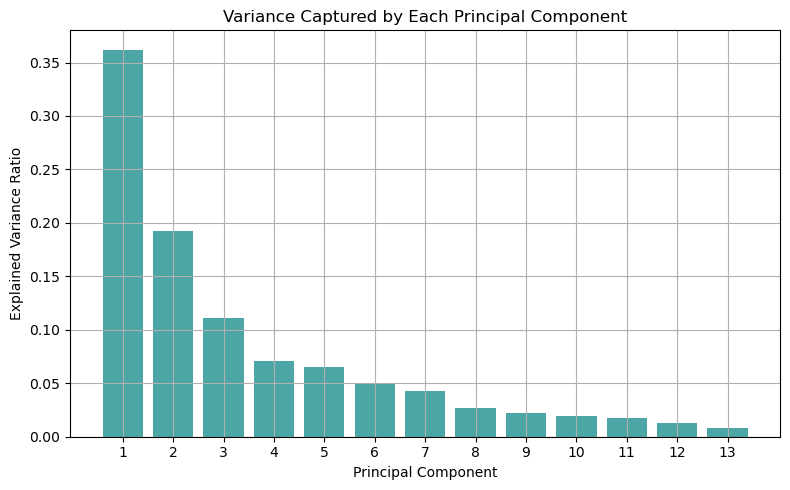

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
wine = load_wine()
X = wine.data

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# 5. Plot the variance captured by each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='teal')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()


### 45. Train a KNN Classifier and perform feature selection before training.


In [27]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Feature selection: select top K best features
k = 5  # You can experiment with different values of k
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 6. Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with top {k} selected features: {accuracy:.4f}")


Accuracy with top 5 selected features: 0.9722


### 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.


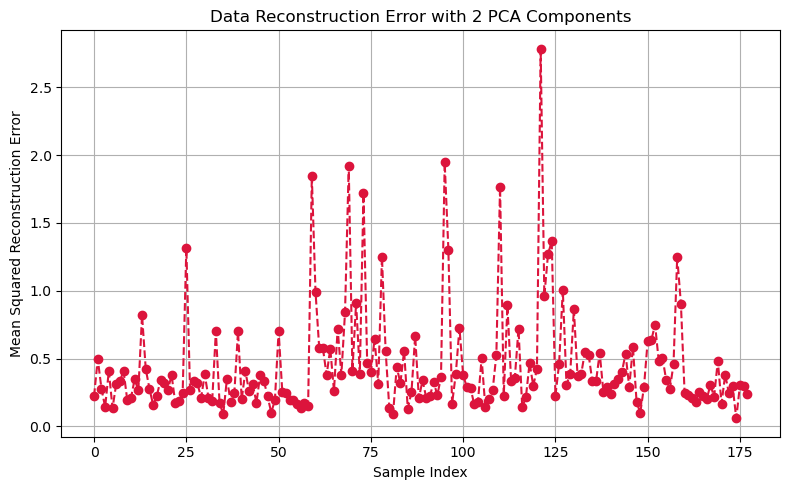

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 1. Load dataset
wine = load_wine()
X = wine.data

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA with reduced dimensions
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# 4. Reconstruct the data from PCA
X_reconstructed = pca.inverse_transform(X_pca)

# 5. Compute reconstruction error for each sample
reconstruction_errors = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

# 6. Plot reconstruction error
plt.figure(figsize=(8, 5))
plt.plot(reconstruction_errors, marker='o', linestyle='--', color='crimson')
plt.title(f'Data Reconstruction Error with {n_components} PCA Components')
plt.xlabel('Sample Index')
plt.ylabel('Mean Squared Reconstruction Error')
plt.grid(True)
plt.tight_layout()
plt.show()


### 47. Train a KNN Classifier and visualize the decision boundary.

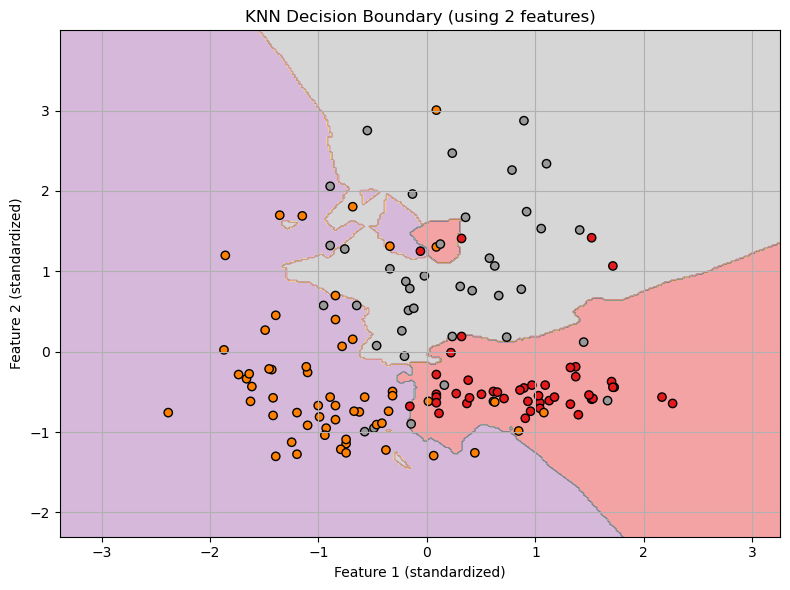

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Load dataset and select 2 features for visualization
wine = load_wine()
X = wine.data[:, :2]  # use only first two features
y = wine.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 5. Create mesh grid for plotting decision boundaries
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 6. Predict on mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1)
plt.title('KNN Decision Boundary (using 2 features)')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 48. Train a PCA model and analyze the effect of different numbers of components on data variance.

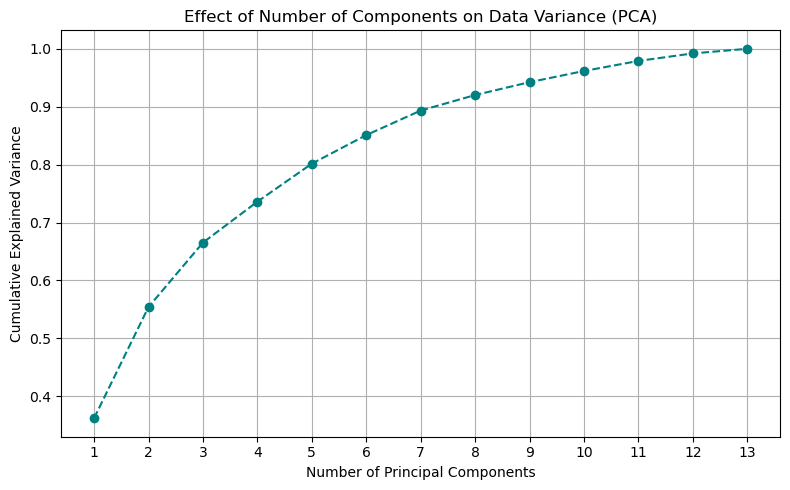

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# 1. Load dataset
wine = load_wine()
X = wine.data

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 5. Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='teal')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Effect of Number of Components on Data Variance (PCA)')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.tight_layout()
plt.show()
